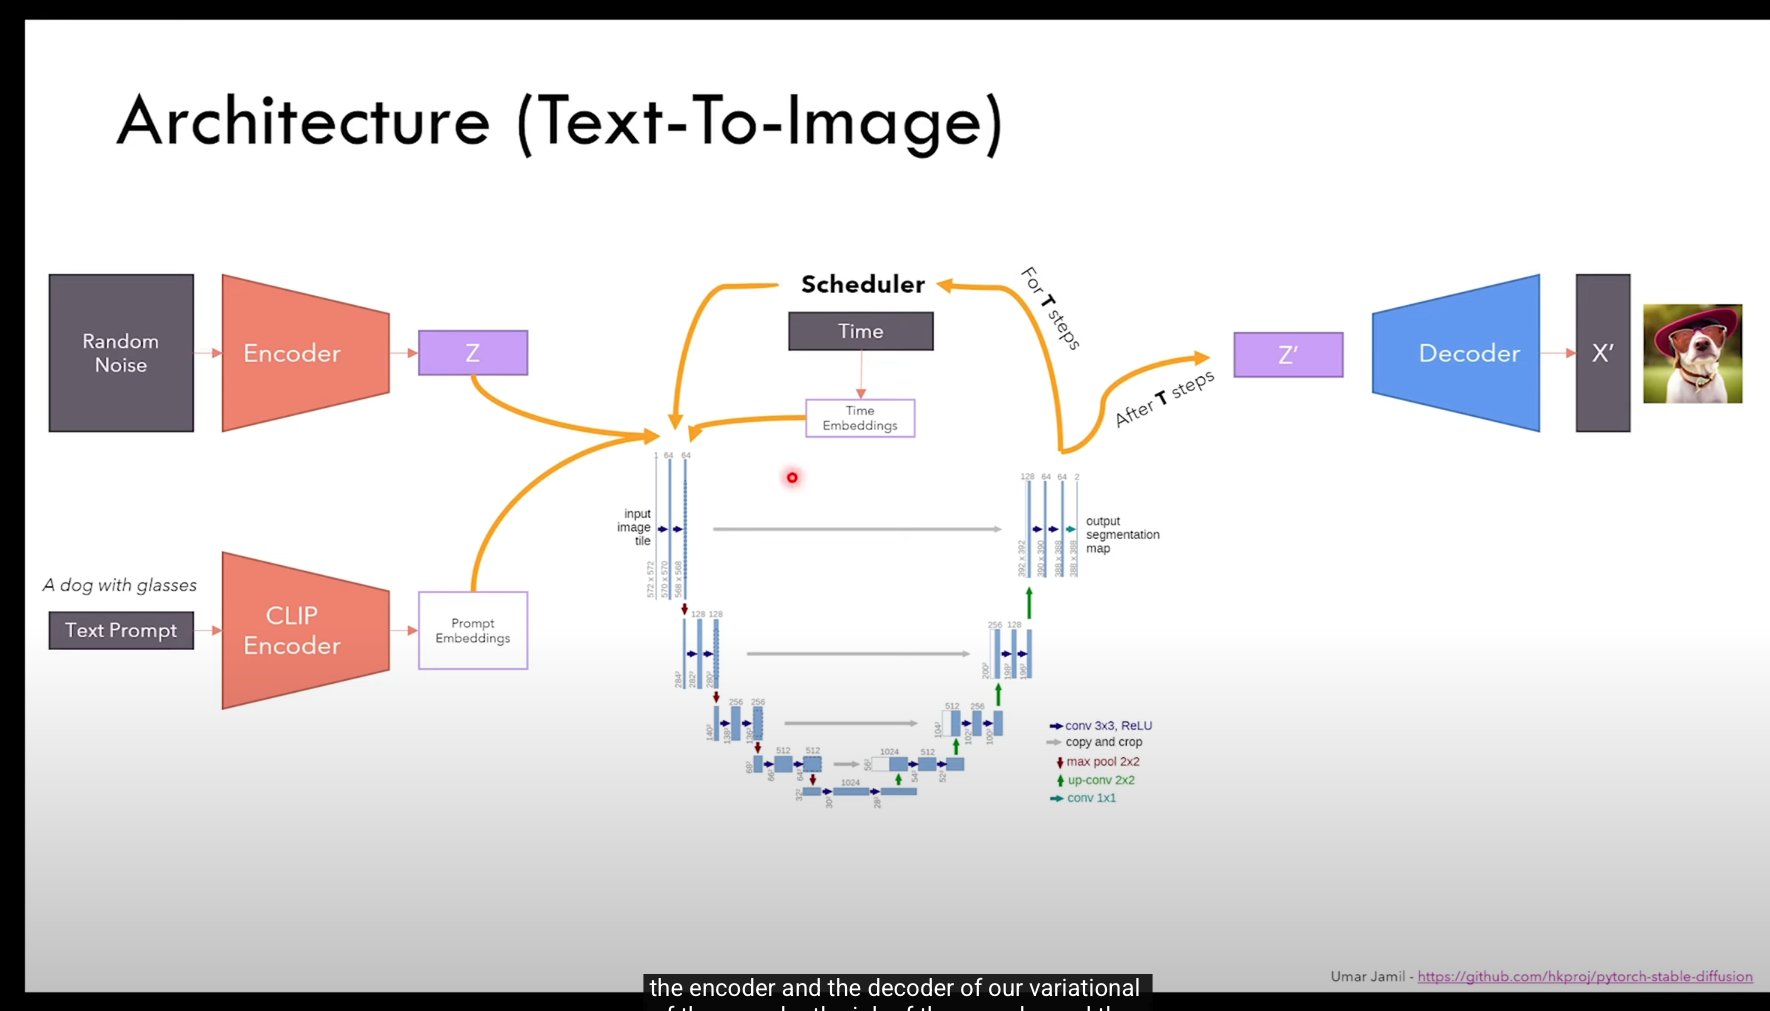



In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from decoder import Vae_AttentionBlock , Vae_ResidualBlock

class VAE_Encoder(nn.Sequential):

    def __init__(self):
        super().__init__(
            nn.Conv2d(3, 128 , kernal_size=3 , padding = 1),        #(batch_size, channel , height , width) --> (batch_size , 128 , height , width) , padding = 1 
            Vae_ResidualBlock(128, 128 ),   #(batch_size, 128 , height , width) --> (batch_size , 128 , height , width)
            Vae_ResidualBlock(128, 128),    #(batch_size, 128 , height , width) --> (batch_size , 128 , height , width)

            nn.Conv2d(3, 128 , kernal_size=3 , stride = 2, padding = 0),  
            Vae_ResidualBlock(128, 256 ), 
            Vae_ResidualBlock(256, 256 ), 

            nn.Conv2d(256, 256 , kernal_size=3 , stride = 2, padding = 0),  
            Vae_ResidualBlock(256, 512 ),
            Vae_ResidualBlock(512, 512 ),

            nn.Conv2d(512, 512, kernal_size=3 , stride = 2, padding = 0),  
            Vae_ResidualBlock(512, 512 ),
            Vae_ResidualBlock(512, 512 ),

            Vae_ResidualBlock(512, 512 ),
            Vae_AttentionBlock(512),
            Vae_ResidualBlock(512, 512),

            nn.GroupNorm(32, 512),

            nn.SiLU(), 

            nn.Conv2d(512 , 8 , kernal_size = 3 , padding = 1),

            nn.Conv2d(8 , 8 , kernal_size = 1 , padding = 0),     
            
            torch.chunk(x, 2, dim=1)  #why do we need this
        )
    def forward(self, x: torch.Tensor , noise: torch.Tensor):
        # x --> data (batch_size, channel , height , width)
        # noise --> data (batch_size, channel , height , width)

        for module in self:
            if getattr(module , "stride", None ) == (2,2):
                #(paddig left , right , top , bottom)
                x = F.pad(x , (0,1,0,1)) #why only right and bottom padding
            x = module(x)
        mean , log_variance = torch.chunk(x , 2 , dim=1)    #chunk divides the dim=1 (channel) into 2 tensor , so each with half the number of channel as before
        log_variance = torch.clamp(log_variance , -30 , 20)
        variance = log_variance.exp() 

        stdev= variance.sqrt()
        
        x = mean + stdev * noise
        x* = 0.8214


ModuleNotFoundError: No module named 'decoder'

In [ ]:
- padding = 1 --> to preserve the spatial dimension after the convolution --> why do we care --> to maintain the same resolution and original structure of the feature map
- which is better increasing stride or kernal size 
- there is no particular reason for using silu(it was found that it works better practically in this kind of network)
- why log_variance
- why chunk
- why clamp --> how does clamp function works --> why do we need to clamp it
- with or without brackets

- asthan pastna§

In [ ]:
# decoder 
class Vae_ResidualBlock():
    def __init__():
        super().__init__()
        self.groupnorm_1 = nn.GroupNorm(32, in_channels)
        self.conv_1 = nn.Conv2d(in_channels , out_channels, kernal_size=3 , padding=1)
        